# Project Preview: Walking Barometer
### Lucille Eva Gorbe

## Goal and Introduction
In this experiment, I seek to examine the ability of the LPS22HB barometric
pressure sensor on-board the Arduino Nano BLE 33 Sense Rev1
to accurately detect real-life differences in elevation under
three conditions: the outdoor environment the barometer is in is below 
zero degrees Celsius; the barometer is being jostled consistently; the
barometer is potentially exposed to wind. These conditions are the same
present in the Project Preview: Roadway Humidity experiment, as the experiments
were conducted simultaneously. This experiment also serves to verify recorded
timings of the walking path and relate them to roadway position for the
aforementioned Roadway Humidity experiment.

If this experiment is proven effective, an topographical map of many local 
regions 
could be developed by collecting a large enough dataset and interpolating
between profiled locations.

## Data
Measurements were taken on Monday, December 15th from 5:23PM to 
5:45PM. They reflect a walking path of Mosher-Jordan Hall
(at approximately 280m elevation) following Washington Heights to the Nichol's
Arboretum main entrance, then following E Medical Center Dr until reaching the
staircase beside the UofM Health East Helipad, at approximately 255m elevation,
and an eventual return to Mosher Jordan Hall following E Medical Center Dr in
the opposite direction.
Six measurements were taken per minute at a consistent 10 second interval.
The long period for measurement cycles was selected due to the long timeline
for the experiment and that the data would be stored on flash. While a higher
frequency was possible, imprecise recordings of location while walking on the
path at long time intervals also encourage more distinction between data
points when grouping them by location.

The barometer was held in an open coat pocket to maximize air exchange for the
simultaneous humidity experiment and was powered by batteries secured in the
same coat pocket.

Station pressure and temperature for Ann Arbor was sourced from 
https://forecast.weather.gov/data/obhistory/KARB.html, and this experiment
assumes hydrostatic balance and constant pressure across walked surface.

----

In [1]:
#!/opt/anaconda3/bin/python base

import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8')

In [6]:
#Import data from datafile
data = np.genfromtxt('hospital.txt', usecols=[0, 1], names=['Index', 'Pressure'])

In [18]:
index = data['Index']
pressure = data['Pressure']
time = index*10/60  # Time in minutes

Text(0, 0.5, 'Pressure (kPa)')

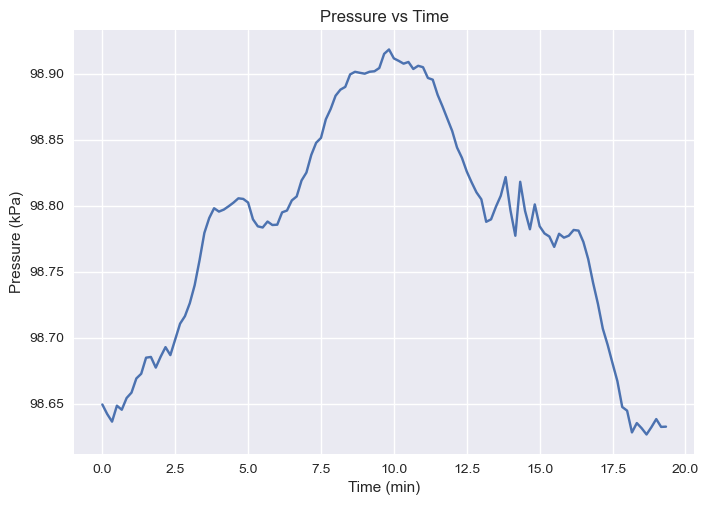

In [19]:
fig, ax = plt.subplots(1,1)
ax.plot(time, pressure)
ax.set_title("Pressure vs Time")
ax.set_xlabel("Time (min)")
ax.set_ylabel("Pressure (kPa)")

In [14]:
# Ann Arbor Station Pressure at time of experiment
pAAmb = 1020.3  # milibars
pAAkPa = pAAmb * 0.1  #kPa
# Ann Arbor temperature at time of experiment 
tempAAF = 16.  # degrees F
tempAAK = (tempAAF - 32) * 5/9 + 273  # K

Rconst = 8314.  # N*m/(kmol*K), ideal gas
M = 29.0  # kg/kmol (mol), dry air average molecular weight

# Using ideal gas law, convert recorded pressure to altitude above SLP
Altitude = np.log(pAAkPa/pressure) * tempAAK * Rconst / (M * 9.81)

Text(0, 0.5, 'Altitude above Sea Level (m)')

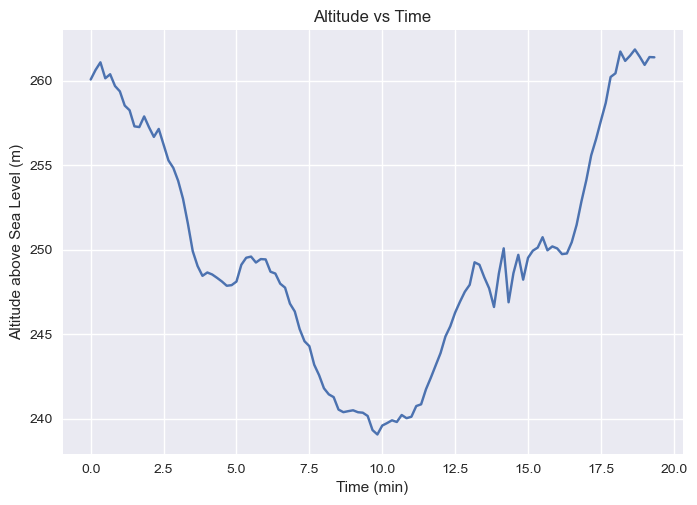

In [20]:
# Plot altitude 
fig, ax = plt.subplots(1,1)
ax.plot(time, Altitude)
ax.set_title("Altitude vs Time")
ax.set_xlabel("Time (min)")
ax.set_ylabel("Altitude above Sea Level (m)")

Locations by time:

Mosher-Jordan Hall: 5:23, 5:45

Arboretum Entrance: 5:27

Adjacent to Helipad: 5:34

Mott Children's Hospital Entrance: 5:39


In [35]:
MoJoS = Altitude[0:10]
MoJoE = Altitude[-10:]
Arb = Altitude[4*6-2:5*6+2]
Heli = Altitude[11*6-2:12*6+2]
Mott = Altitude[16*6-2:17*6+2]

# Check for consistency
print("Diff in average MoJo Altitudes in m: ")
print(np.average(MoJoS)-np.average(MoJoE))

# Arboretum entrance is very similar in elevation to the Mott entrance
print("Diff between Arb and Mott Altitidues in m: ")
print(np.average(Arb)-np.average(Mott))

# Check for known difference of about 25m
print("Diff in MoJo vs Helipad Altitudes in m: ")
print(np.average(MoJoS)-np.average(Heli))

print("Maximum difference in altitude in m: ")
print(Altitude.max() - Altitude.min())

Diff in average MoJo Altitudes in m: 
-1.6560188186589926
Diff between Arb and Mott Altitidues in m: 
-3.0103662905969486
Diff in MoJo vs Helipad Altitudes in m: 
17.740781139365765
Maximum difference in altitude in m: 
22.77919875328422


## Results & Conclusions
The LPS22HB barometric
pressure sensor well demonstrates responsivity to changes in altitude. Some
systematic error is present, either in the in-code processing of this data
or the actual calibration of the barometer. A smaller difference in altitude
was recorded between Mosher-Jordan Hall and E Medical Center Dr adjacent to
the East Helipad than was expected, though only by around 3 meters. Recorded
elevation
is fairly consistent temporally, as shown in the Mosher-Jordan Hall
comparison.

Noise generally plays a small role in this data, as shown in the above figures,
though it notably had impact near Mott's Children's Hospital (visible in
the spikes). In that region, very small known elevation "wobbles" (the land is
generally smooth with a small uphill) might indicate wind-based impacts
on the barometer readings, as it was very windy at that time and location
compared to all other times. 

Overall, a "Walking Barometer" method as employed above is likely effective
enough for mapping differences in elevation and potentially applying to
some sort of topographical map, though stronger calibration of the devices or
output formula is necessary for representing an area accurately. Additionally,
better route tracking would keep such a profile more consistent. This may
be implemented by tracking time down to the resolution of the barometer (10s)
when recording location or by recording data multiple times at a specific
location while minimizing error-causing winds.